<a href="https://colab.research.google.com/github/Jaise152/CDK/blob/master/Deep_Learning_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random
import pandas as pd

In [ ]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
ima = keras.datasets.fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train = np.array(train_images)
train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_images.shape

NameError: ignored

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

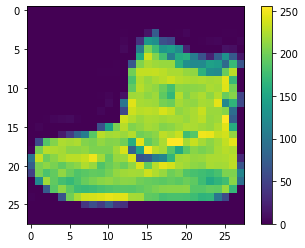

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

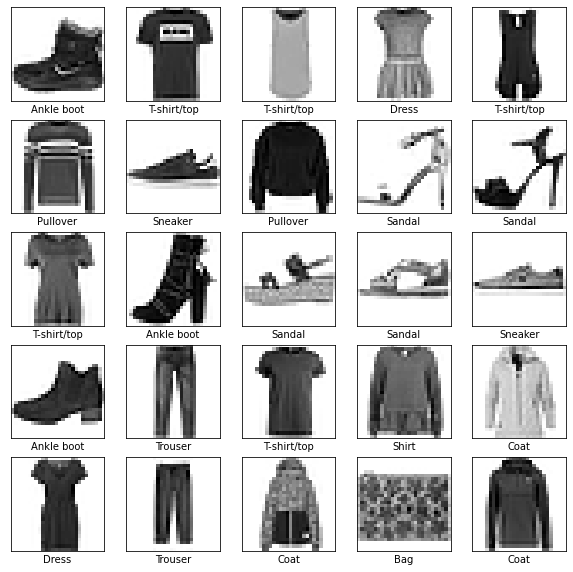

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# We normalise the loaded images
# i.e we convert the pixel values which lie between 0-255 into values between 0-1

train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# We are building a sequential model

model_CrossEntropy = tf.keras.models.Sequential()

# Add the input layer

model_CrossEntropy.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Add a hidden layer

model_CrossEntropy.add(tf.keras.layers.Dense(units=128,kernel_regularizer=keras.regularizers.l2(.0001), activation="relu"))
model_CrossEntropy.add(tf.keras.layers.Dropout(0.2))
#model_CrossEntropy.add(tf.keras.layers.Dense(units=64,kernel_regularizer=keras.regularizers.l2(.001), activation="sigmoid"))

# Add an output layer

model_CrossEntropy.add(tf.keras.layers.Dense(units=10,kernel_regularizer=keras.regularizers.l2(.0001), activation = "softmax"))



In [ ]:
# We are building a sequential model

model_CrossEntropy = tf.keras.models.Sequential()

# Add the input layer

model_CrossEntropy.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Add a hidden layer

model_CrossEntropy.add(tf.keras.layers.Dense(units=128,kernel_regularizer=keras.regularizers.l2(.0001), activation="relu"))
model_CrossEntropy.add(tf.keras.layers.Dropout(0.2))
#model_CrossEntropy.add(tf.keras.layers.Dense(units=64,kernel_regularizer=keras.regularizers.l2(.001), activation="sigmoid"))

# Add an output layer

model_CrossEntropy.add(tf.keras.layers.Dense(units=10,kernel_regularizer=keras.regularizers.l2(.0001), activation = "softmax"))



In [ ]:
model_CrossEntropy.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','mean_squared_error'])

In [ ]:
# fit the data to the model

history = model_CrossEntropy.fit(train_images, train_labels, epochs=50,batch_size= 100,validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 1.6232 - accuracy: 0.8763 - mean_squared_error: 27.7651 - val_loss: 1.6271 - val_accuracy: 0.8702 - val_mean_squared_error: 27.4093
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 1.6218 - accuracy: 0.8791 - mean_squared_error: 27.7651 - val_loss: 1.6254 - val_accuracy: 0.8724 - val_mean_squared_error: 27.4088
Epoch 3/50
480/480 [==============================] - 2s 3ms/step - loss: 1.6226 - accuracy: 0.8767 - mean_squared_error: 27.7649 - val_loss: 1.6319 - val_accuracy: 0.8668 - val_mean_squared_error: 27.4087
Epoch 4/50
480/480 [==============================] - 2s 3ms/step - loss: 1.6217 - accuracy: 0.8787 - mean_squared_error: 27.7650 - val_loss: 1.6305 - val_accuracy: 0.8677 - val_mean_squared_error: 27.4090
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 1.6202 - accuracy: 0.8796 - mean_squared_error: 27.7651 - val_loss: 1.6274 - val_accuracy: 0.8702 - va

In [ ]:
test_loss, test_acc = model_CrossEntropy.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.6318 - accuracy: 0.8713 - mean_squared_error: 27.6930


ValueError: ignored

In [ ]:
history.history

{'accuracy': [0.8762500286102295,
  0.8790833353996277,
  0.8767291903495789,
  0.8787291646003723,
  0.8795833587646484,
  0.8782708048820496,
  0.8801249861717224,
  0.8798750042915344,
  0.8809999823570251,
  0.8804374933242798,
  0.8788124918937683,
  0.8808749914169312,
  0.8817916512489319,
  0.8808958530426025,
  0.8837083578109741,
  0.8818958401679993,
  0.883145809173584,
  0.8823958039283752,
  0.882687509059906,
  0.8845000267028809,
  0.8817916512489319,
  0.8845000267028809,
  0.8833541870117188,
  0.8836249709129333,
  0.8828333616256714,
  0.8853750228881836,
  0.8857083320617676,
  0.8851041793823242,
  0.8835416436195374,
  0.8856874704360962,
  0.8845833539962769,
  0.8842083215713501,
  0.8852291703224182,
  0.8858749866485596,
  0.8849583268165588,
  0.8842083215713501,
  0.8857499957084656,
  0.8859166502952576,
  0.8853750228881836,
  0.8856250047683716,
  0.8857916593551636,
  0.8886458277702332,
  0.8866875171661377,
  0.8879166841506958,
  0.8868958353996277,


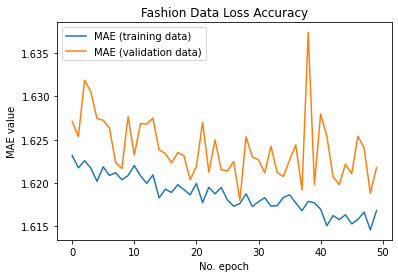

In [ ]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Fashion Data Loss Accuracy')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

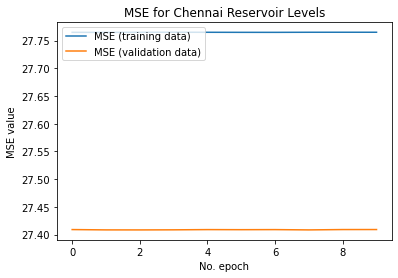

In [ ]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.summary()

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = model.predict(test_images)
predictions.shape

In [ ]:
test_labels.shape

In [ ]:
Test = pd.DataFrame(test_images, test_labels)

In [ ]:
Test.shape

In [ ]:
res = tf.math.confusion_matrix(test_labels,predictions) 

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]